# **Import Packages**

In [32]:
#Import required packages
% pip install yfinance
% pip install pandas
% pip install tabula-py
% pip install kaggle

import matplotlib.pyplot as plt
import tabula
import pandas as pd
import io
import os
import json
import zipfile
from google.colab import files
from google.colab import data_table



{}

# **Extract**

# **Clean**

# **Transform**

# **Load**



# **COVID-19 General Data Pre-processing**


Taking out unwanted columns and merging tables together


**Current Cases**

In [47]:
os.environ['KAGGLE_CONFIG_DIR'] = "https://github.com/filbertmiko/Analysis-of-COVID-19-and-its-Impact-on-IHSG-and-Rupiah/"
file_path_indonesia = 'https://raw.githubusercontent.com/filbertmiko/Analysis-of-COVID-19-and-its-Impact-on-IHSG-and-Rupiah/main/kaggle.json'

#Importing Kaggle Api json file using aslisabanci's code from github as a reference
#!kaggle datasets download -d hendratno/covid19-indonesia
!pwd
#files.upload()
#!mkdir -p ~/.kaggle #create the .kaggle directory and put your credentials json file into it
#!cp kaggle.json ~/.kaggle/

/content


In [35]:
#COVID_df is the dataframe that contains all the information - will be used for timeseries
#Reads in the csv from the URL 
file_path_OWID = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
file_path_COVID_OPEN_DATA = "https://storage.googleapis.com/covid19-open-data/v2/by-sex.csv"
file_path_GRS = "https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv"
file_path_demographics = "https://storage.googleapis.com/covid19-open-data/v2/demographics.csv"
file_path_geography = "https://storage.googleapis.com/covid19-open-data/v2/geography.csv"
file_path_IQ = "https://raw.githubusercontent.com/filbertmiko/Analysis-of-COVID-19-and-its-Impact-on-IHSG-and-Rupiah/main/countriesByIQ.csv"
file_path_PR = "https://raw.githubusercontent.com/filbertmiko/Analysis-of-COVID-19-and-its-Impact-on-IHSG-and-Rupiah/main/povertyRate.csv"
file_path_index = "https://storage.googleapis.com/covid19-open-data/v2/index.csv"
api_token_kaggle = {"username":"filbertlinardi","key":"80e1886045f545ff98a4ecf2e4d353e0"}

#COVID_df is the dataframe that contains all the information - will be used for timeseries
#Reads in the csv from the URL
COVID_df = pd.read_csv(file_path_OWID)
index_df = pd.read_csv(file_path_index)
demographics_df = pd.read_csv(file_path_demographics)
geo_df = pd.read_csv(file_path_geography)
iq_per_country_df = pd.read_csv(file_path_IQ)
poverty_rate_df = pd.read_csv(file_path_PR)

FileNotFoundError: ignored

In [4]:
#current_cases_df = Most Current COVID-19 Cases. This dataframe will have the most current
#COVID_19 total cases for each country
from datetime import datetime, timedelta

#Conver the format of "date" to Date
COVID_df['date'] = pd.to_datetime(COVID_df.date)

#Remove unwanted columns
COVID_df = COVID_df.drop(['reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
               'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_cases_smoothed',
               'new_deaths_smoothed', 'new_cases_smoothed_per_million','new_deaths_smoothed_per_million','new_tests_smoothed', 'new_tests_smoothed_per_thousand',
               'new_vaccinations_smoothed', 'new_vaccinations_smoothed_per_million', 'female_smokers', 'male_smokers'], axis=1)

#Add daily percentage change as daily_%_change

COVID_df
#Change datas with NaN to 0


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62076,ZWE,Africa,Zimbabwe,2021-01-20,29408.0,733.0,879.0,54.0,1978.614,49.317,59.140,3.633,285054.0,4418.0,19.179,0.297,0.210,4.8,tests performed,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,36.791,1.7,61.49,0.535
62077,ZWE,Africa,Zimbabwe,2021-01-21,30047.0,639.0,917.0,38.0,2021.607,42.993,61.697,2.557,288311.0,3257.0,19.398,0.219,0.190,5.3,tests performed,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,36.791,1.7,61.49,0.535
62078,ZWE,Africa,Zimbabwe,2021-01-22,30523.0,476.0,962.0,45.0,2053.633,32.026,64.725,3.028,292140.0,3829.0,19.656,0.258,0.176,5.7,tests performed,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,36.791,1.7,61.49,0.535
62079,ZWE,Africa,Zimbabwe,2021-01-23,31007.0,484.0,974.0,12.0,2086.197,32.564,65.532,0.807,294685.0,2545.0,19.827,0.171,0.171,5.8,tests performed,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,36.791,1.7,61.49,0.535


**Create new dataframe to hold only the most recent data**

In [5]:
#Get yesterday's date as there may be a delay in the update of the dataset used here
yesterday = datetime.today() - timedelta(2)

#Add each country's most recent data and add it into current_cases_df
current_total_cases_df = COVID_df.loc[(COVID_df['date'].dt.date.astype(str) == yesterday.strftime('%Y-%m-%d'))]

#Reset the index for current_cases_df
current_total_cases_df = current_total_cases_df.reset_index(drop=True)

current_total_cases_df.loc[current_total_cases_df['location'] == "World"]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
188,OWID_WRL,NaN,World,2021-01-24,99194405.0,447423.0,2129409.0,8791.0,12725.717,57.4,273.183,1.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66332144.0,NaN,0.85,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.07,8.51,60.13,2.705,72.58,NaN


**Function to get the date of the first detected COVID-19 case/s for each country**

In [6]:
def get_first_case_date(country):
  date = ""
  first_case = COVID_df.loc[(COVID_df['location'] == country) & (COVID_df['total_cases'] > 0)]
  if len(first_case) > 0:
    date = first_case['date'].iloc[0]
  else:
    date = "No such country"

  return date

get_first_case_date("Japan")

Timestamp('2020-01-22 00:00:00')

# **Government Response and Stringency**

In [7]:
#COVID_df is the dataframe that contains all the information - will be used for timeseries
GR_df = pd.read_csv(file_path_GRS)
#Change data types for Date column into date type
GR_df['Date'] = pd.to_datetime(GR_df['Date'].astype(str), format='%Y%m%d')


GR_df = GR_df.loc[(GR_df['CountryName'] == "Indonesia") & (GR_df['Date'] >= "2020-02-02")]
GR_df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
46952,Indonesia,IDN,NaN,NaN,NAT_TOTAL,2020-02-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,NaN,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,13.89,13.89,17.86,17.86,8.33,8.33,9.62,9.62,0.0,0.0
46953,Indonesia,IDN,NaN,NaN,NAT_TOTAL,2020-02-03,3.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,NaN,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,23.15,23.15,28.57,28.57,13.89,13.89,16.03,16.03,0.0,0.0
46954,Indonesia,IDN,NaN,NaN,NAT_TOTAL,2020-02-04,3.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,NaN,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,23.15,23.15,28.57,28.57,13.89,13.89,16.03,16.03,0.0,0.0
46955,Indonesia,IDN,NaN,NaN,NAT_TOTAL,2020-02-05,3.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,3.0,0.0,NaN,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,28.70,28.70,35.71,35.71,17.22,17.22,19.87,19.87,0.0,0.0
46956,Indonesia,IDN,NaN,NaN,NAT_TOTAL,2020-02-06,3.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,3.0,0.0,NaN,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,28.70,28.70,35.71,35.71,17.22,17.22,19.87,19.87,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47306,Indonesia,IDN,NaN,NaN,NAT_TOTAL,2021-01-21,2.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,NaN,NaN,951651.0,27203.0,64.35,64.35,69.76,69.76,55.83,55.83,58.65,58.65,37.5,37.5
47307,Indonesia,IDN,NaN,NaN,NAT_TOTAL,2021-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,965283.0,27453.0,NaN,64.35,NaN,69.76,NaN,55.83,NaN,58.65,NaN,37.5
47308,Indonesia,IDN,NaN,NaN,NAT_TOTAL,2021-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977474.0,27664.0,NaN,64.35,NaN,69.76,NaN,55.83,NaN,58.65,NaN,37.5
47309,Indonesia,IDN,NaN,NaN,NAT_TOTAL,2021-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,989262.0,27835.0,NaN,64.35,NaN,69.76,NaN,55.83,NaN,58.65,NaN,37.5


# **COVID-19 per Continent Data Pre-Processing + Data Visualisation**


Creating a dataframe for each continent

**Exploring Columns**

In [8]:
#current_cases_df['continent'].value_counts()

**Function to get time series data for each continent and country**

In [9]:
timeseries_country_df = COVID_df.copy()
timeseries_country_df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62076,ZWE,Africa,Zimbabwe,2021-01-20,29408.0,733.0,879.0,54.0,1978.614,49.317,59.140,3.633,285054.0,4418.0,19.179,0.297,0.210,4.8,tests performed,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,36.791,1.7,61.49,0.535
62077,ZWE,Africa,Zimbabwe,2021-01-21,30047.0,639.0,917.0,38.0,2021.607,42.993,61.697,2.557,288311.0,3257.0,19.398,0.219,0.190,5.3,tests performed,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,36.791,1.7,61.49,0.535
62078,ZWE,Africa,Zimbabwe,2021-01-22,30523.0,476.0,962.0,45.0,2053.633,32.026,64.725,3.028,292140.0,3829.0,19.656,0.258,0.176,5.7,tests performed,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,36.791,1.7,61.49,0.535
62079,ZWE,Africa,Zimbabwe,2021-01-23,31007.0,484.0,974.0,12.0,2086.197,32.564,65.532,0.807,294685.0,2545.0,19.827,0.171,0.171,5.8,tests performed,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,36.791,1.7,61.49,0.535


**Calculates data to be added into the current_COVID_df dataframe**

In [10]:
#This function returns a dataframe with the most current COVID-19 data worldwide
current_COVID_df = current_total_cases_df

def calculate_data(df):
  #Add CFR (Case Fatality Rate) column
  # no of deaths/no of cases
  df['CFR'] = df.total_deaths / df.total_cases
  #Add MR (Mortality Rate) column
  # no of deaths/populataion
  df['MR'] = df.total_deaths / df.population
  #add number of cases per population rate column
  # no of cases/population
  df['cases_per_population'] = df.total_cases / df.population
  return df

current_COVID_df = calculate_data(current_COVID_df)

**Adds in external data such as:**

1.   Longitude, Latitude, Rural and Urban Area - Geography
2.   Urban, Rural, Largest City Population - Demographics
4.   Intelligence Quotient
5.   Poverty Rate 
6.   Median Income




**Pre-process external datasets**

**Merge demographics with current cases**

In [12]:
index_df.dropna(subset = ["datacommons"], inplace=True)

index_df['key'] = index_df['key'].astype('str')
index_df = index_df.loc[index_df['key'].str.len() == 2]

index_copy = index_df.copy()
index_copy.reset_index(drop=True)
index_copy = index_copy[['key', 'country_name']]

In [13]:
#geo_df
iq_df = iq_per_country_df.copy()
iq_df['country'] = iq_df['country'].str.capitalize() 
iq_df = iq_df.drop(['rank', 'pop2020'], axis=1)
iq_df = iq_df.rename(columns={'country': 'country_name',
                              'iq': 'average_iq'})
iq_df = iq_df.sort_values('country_name')
iq_df

,country_name,average_iq
107,Afghanistan,84
58,Albania,90
119,Algeria,83
22,Andorra,98
169,Angola,68
...,...,...
104,Venezuela,84
46,Vietnam,94
92,Yemen,85
135,Zambia,79


In [14]:
pr_df = poverty_rate_df.copy()
pr_df = pr_df.drop(['pop2020'], axis=1)
pr_df = pr_df.sort_values('country')
pr_df = pr_df.rename(columns={'povertyRate': 'poverty_rate', 
                              'country': 'country_name'})
pr_df

,country_name,poverty_rate
148,Afghanistan,54.5
37,Albania,14.3
6,Algeria,5.5
112,Angola,32.3
120,Argentina,35.5
...,...,...
114,Venezuela,33.1
10,Vietnam,6.7
142,Yemen,48.6
147,Zambia,54.4


In [15]:
demog = demographics_df.copy()
demog = demog.merge(index_copy, how='inner', on='key')

In [16]:
columns = ['country_name','rural_population', 'urban_population']
demog_df = demog[columns]
demog_df

,country_name,rural_population,urban_population
0,Andorra,9269.0,67873.0
1,United Arab Emirates,1290785.0,8479744.0
2,Afghanistan,28244481.0,9797273.0
3,Antigua and Barbuda,73318.0,23800.0
4,Anguilla,NaN,NaN
...,...,...,...
232,Yemen,18292399.0,10869523.0
233,Mayotte,NaN,NaN
234,South Africa,19408553.0,39149717.0
235,Zambia,9989317.0,7871713.0


**Merging demography dataframe to current_COVID_df**

In [19]:
COVID_current_merge = current_COVID_df.copy()

cur_columns = ['iso_code', 'location', 'total_cases', 'total_deaths',
           'total_cases_per_million', 'total_deaths_per_million', 'population', 
           'population_density','gdp_per_capita', 'life_expectancy', 
           'human_development_index']

columns_fillna = ['total_cases', 'total_deaths','total_cases_per_million', 
                  'total_deaths_per_million', 'population', 'population_density',
                  'gdp_per_capita', 'life_expectancy', 'human_development_index']

COVID_current_merge = COVID_current_merge[cur_columns]
COVID_current_merge = COVID_current_merge.rename(columns={'location': 'country_name'})

COVID_current_merge = COVID_current_merge.merge(demog_df, how='inner', on='country_name')
COVID_current_merge.drop_duplicates(subset='country_name', keep = 'last', inplace = True)

COVID_current_merge = COVID_current_merge.merge(pr_df, how='inner', on='country_name')
COVID_current_merge = COVID_current_merge.merge(iq_df, how='inner', on='country_name')

#Replace NaNs from the current_covid_df with 0
for column in columns_fillna:
  COVID_current_merge[column] = COVID_current_merge[column].fillna(0)

#Remove records with NaNs in columns rural_population and urban_population

data_table.DataTable(COVID_current_merge)

,iso_code,country_name,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,population,population_density,gdp_per_capita,life_expectancy,human_development_index,rural_population,urban_population,poverty_rate,average_iq
0,AFG,Afghanistan,54595.0,2378.0,1402.449,61.087,38928341.0,54.422,1803.987,64.83,0.498,28244481.0,9797273.0,54.5,84
1,ALB,Albania,72274.0,1315.0,25114.323,456.946,2877800.0,104.871,11803.431,78.57,0.785,1106598.0,1747593.0,14.3,90
2,DZA,Algeria,105596.0,2863.0,2408.061,65.289,43851043.0,17.348,13913.839,76.88,0.754,11542954.0,31510100.0,5.5,83
3,AGO,Angola,19399.0,459.0,590.240,13.966,32866268.0,23.890,5819.495,61.15,0.581,10764270.0,21061025.0,32.3,68
4,ARG,Argentina,1867223.0,46827.0,41314.103,1036.092,45195777.0,16.177,18933.907,76.67,0.825,3599141.0,41339571.0,35.5,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,VEN,Venezuela,123709.0,1148.0,4350.445,40.371,28435943.0,36.253,16745.022,72.06,0.761,3353461.0,25162368.0,33.1,84
123,VNM,Vietnam,1548.0,35.0,15.903,0.360,97338583.0,308.127,6171.884,75.40,0.694,61129966.0,35332140.0,6.7,94
124,YEM,Yemen,2118.0,615.0,71.012,20.620,29825968.0,53.508,1479.147,66.12,0.452,18292399.0,10869523.0,48.6,85
125,ZMB,Zambia,45337.0,639.0,2466.118,34.759,18383956.0,22.995,3689.251,63.89,0.588,9989317.0,7871713.0,54.4,79


In [18]:
twnty_population = COVID_current_merge.loc[COVID_current_merge['population'] > 19000000].sum().population
world_population = current_total_cases_df.loc[current_total_cases_df['location'] == "World"].population

percentage = (twnty_population/world_population)*100

print(percentage)


188    80.679324
Name: population, dtype: float64


**Function to get current cases for each continent and country**



# **Getters**

In [20]:
def get_dates():
  date_df = timeseries_country_df.copy()
  date_df.drop_duplicates(subset ="date", keep = 'last', inplace = True)
  dates = date_df.date.dt.strftime('%Y-%m-%d').unique()
  
  return dates

def get_timeseries_per_country(country):
  ts_df = timeseries_country_df.loc[(timeseries_country_df['location'] == country)]
  ts_df = ts_df.reset_index(drop=True)
  ts_df = ts_df.set_index('date')

  return ts_df

def get_timeseries_per_continent(continent):
  
  dates = get_dates()

  column_names = ['date', 'continent', 'continent_total_cases', 'continent_total_deaths',  'continent_total_cases_per_million', 'continent_total_deaths_per_million']
  continent_timeseries_cases_df = pd.DataFrame(columns = column_names)

  for date in dates:
    ts_df = COVID_df.loc[(COVID_df['continent'] == continent)].copy()
    #Gets the total number of cases in a continent
    continent_total_cases = ts_df.loc[(ts_df.date == date, 'total_cases')].sum()
    #Gets the total number of deaths in a continent
    continent_total_deaths = ts_df.loc[(ts_df.date == date, 'total_deaths')].sum()
    #Gets the total number of cases per million in a continent
    continent_total_cases_per_million = ts_df.loc[(ts_df.date == date, 'total_cases_per_million')].sum()
    #Gets the total number of cases per million in a continent
    continent_total_deaths_per_million = ts_df.loc[(ts_df.date == date, 'total_deaths_per_million')].sum()
    
    #Append df2 into continent_timeseries_cases_df
    df2 = pd.DataFrame({"date":[date], 
                        "continent":[continent],
                        'continent_total_cases': [continent_total_cases],
                        'continent_total_deaths': [continent_total_deaths],
                        'continent_total_cases_per_million': [continent_total_cases_per_million],
                        'continent_total_deaths_per_million': [continent_total_deaths_per_million]}) 
    
    continent_timeseries_cases_df = continent_timeseries_cases_df.append(df2, ignore_index = True)

  continent_timeseries_cases_df = continent_timeseries_cases_df.reset_index(drop=True)
  continent_timeseries_cases_df = continent_timeseries_cases_df.set_index('date')

  return continent_timeseries_cases_df

#Delete this later on
#only used to check if the function works correctly
asia_ts = get_timeseries_per_continent("Asia")
europe_ts = get_timeseries_per_continent("Europe")
africa_ts = get_timeseries_per_continent("Africa")
na_ts = get_timeseries_per_continent("North America")
sa_ts = get_timeseries_per_continent("South America")
oceania_ts = get_timeseries_per_continent("Oceania")
#Delete this later on

In [21]:
data_table.DataTable(oceania_ts)

,continent,continent_total_cases,continent_total_deaths,continent_total_cases_per_million,continent_total_deaths_per_million
date,,,,,
2020-01-01,Oceania,0.0,0.0,0.000,0.000
2020-01-02,Oceania,0.0,0.0,0.000,0.000
2020-01-03,Oceania,0.0,0.0,0.000,0.000
2020-01-04,Oceania,0.0,0.0,0.000,0.000
2020-01-05,Oceania,0.0,0.0,0.000,0.000
...,...,...,...,...,...
2021-01-20,Oceania,31930.0,945.0,1857.872,44.068
2021-01-21,Oceania,31946.0,945.0,1868.668,44.068
2021-01-22,Oceania,31951.0,945.0,1868.864,44.068


In [22]:
#Get most current COVID-19 data per Continent
def get_current_cases_continent(continents):
  
  column_names = ['continent', 'continent_total_cases', 'continent_total_deaths', 
                  'continent_total_cases_per_million', 'continent_total_deaths_per_million',
                  'average_CFR_per_continent', 'average_MR_per_continent', 'average_continent_cases_per_population']

  continent_cases_df = pd.DataFrame(columns = column_names)

  for continent in continents:
    current_cases_df = current_COVID_df.loc[(current_COVID_df['continent'] == continent)].reset_index(drop=True)
    #Gets the total number of cases in a continent
    continent_total_cases = current_cases_df['total_cases'].sum()
    #Gets the total number of deaths in a continent
    continent_total_deaths = current_cases_df['total_deaths'].sum()
    #Gets the total number of cases per million in a continent
    continent_total_cases_per_million = current_cases_df['total_cases_per_million'].sum()
    #Gets the total number of cases per million in a continent
    continent_total_deaths_per_million = current_cases_df['total_deaths_per_million'].sum()
    #Gets the average CFR of a continent
    average_CFR_per_continent = current_cases_df['CFR'].sum()/current_cases_df['location'].count()
    #Gets the average MR of a continent
    average_MR_per_continent = current_cases_df['MR'].sum()/current_cases_df['location'].count()
    #Gets the average cases per population in each continent
    average_continent_cases_per_population = current_cases_df['cases_per_population'].sum()/current_cases_df['location'].count()
    #Drop all duplicates except 1
    current_cases_df.drop_duplicates(subset ="continent", keep = 'last', inplace = True)
    #Drop all columns except continent, continent_total_cases, continent_total_deaths
    #Append df2 into continent_timeseries_cases_df
    df2 = pd.DataFrame({'continent':[continent],
                        'continent_total_cases': [continent_total_cases],
                        'continent_total_deaths': [continent_total_deaths],
                        'continent_total_cases_per_million': [continent_total_cases_per_million],
                        'continent_total_deaths_per_million': [continent_total_deaths_per_million],
                        'average_CFR_per_continent': [average_CFR_per_continent],
                        'average_MR_per_continent': [average_MR_per_continent],
                        'average_continent_cases_per_population': [average_continent_cases_per_population]}) 
    #Adds each continent df to continent_cases_df 
    continent_cases_df = continent_cases_df.append(df2, ignore_index = True)

  return continent_cases_df

#Get most current total COVID-19 data per country
def get_current_cases_country(country):
  current_cases_df = current_COVID_df.loc[(current_COVID_df['location'] == country)].reset_index(drop=True)
  return current_cases_df

#This function takes in an array of countries in String and
#outputs a barchart comparing the total number of COVID-19 cases
#index: 1 - total cases
#       2 - total deaths
#       5 - total cases per million
#       6 - total deaths per million
#       5 - CFR
#       6 - MR
#       7 - cases per population
def bar_chart_compare_countries(countries, index):
  if len(countries) > 0:
    if index == 1:
      for country in countries:
          current_cases = get_current_cases_country(country).total_cases
          plt.barh(country, current_cases, align='center', alpha=0.5)

      plt.xlabel('Total Number of Cases')
      plt.ylabel('Countries')
      plt.tight_layout()
      plt.title('Current Confirmed Cases')
      plt.show()
    elif index == 2:
      for country in countries:
          current_cases = get_current_cases_country(country).total_deaths
          plt.barh(country, current_cases, align='center', alpha=0.5)

      plt.xlabel('Total Number of Deaths Cases')
      plt.ylabel('Countries')
      plt.tight_layout()
      plt.title('Current Confirmed Deaths')
      plt.show()
    elif index == 3:
      for country in countries:
          current_cases = get_current_cases_country(country).total_cases_per_million
          plt.barh(country, current_cases, align='center', alpha=0.5)

      plt.xlabel('Total Number of Cases per Million')
      plt.ylabel('Countries')
      plt.tight_layout()
      plt.title('Current Confirmed Cases per million')
      plt.show()
    elif index == 4:
      for country in countries:
          current_cases = get_current_cases_country(country).total_deaths_per_million
          plt.barh(country, current_cases, align='center', alpha=0.5)

      plt.xlabel('Total Number of Deaths Cases per Million')
      plt.ylabel('Countries')
      plt.tight_layout()
      plt.title('Current Confirmed Deaths per Million')
      plt.show()
    elif index == 5:
      for country in countries:
          CFR = get_current_cases_country(country).CFR * 100
          plt.barh(country, CFR, align='center', alpha=0.5)

      plt.xlabel('CFR %')
      plt.ylabel('Countries')
      plt.tight_layout()
      plt.title('Current CFR')
      plt.show()
    elif index == 6:
      for country in countries:
          MR = get_current_cases_country(country).MR * 100
          plt.barh(country, MR, align='center', alpha=0.5)

      plt.xlabel('MR %')
      plt.ylabel('Countries')
      plt.tight_layout()
      plt.title('Current MR')
      plt.show()
    elif index == 7:
      for country in countries:
          MR = get_current_cases_country(country).cases_per_population * 100
          plt.barh(country, MR, align='center', alpha=0.5)

      plt.xlabel('Cases per population %')
      plt.ylabel('Countries')
      plt.tight_layout()
      plt.title('Current Cases per Population')
      plt.show()
    else:
      print("index was not inputted or non-existent")
  else:
    print("No countries were inputted")
  #End of function

#This function takes in an array of countries in String and
#outputs a barchart comparing the total number of COVID-19 cases
def bar_chart_compare_cases_continents(continents):
  ts_columns = ['continent', 'continent_total_cases']

  continent_df = get_current_cases_continent(continents)

  for continent in continents:
      continent_total_cases = continent_df.loc[(continent_df['continent'] == continent)].continent_total_cases
      plt.barh(continent, continent_total_cases, align='center', alpha=0.5)

  plt.xlabel('Total Number of Cases')
  plt.ylabel('Continents')
  plt.tight_layout()
  plt.title('Current Confirmed Cases per Continent')
  plt.show()
  #End of function

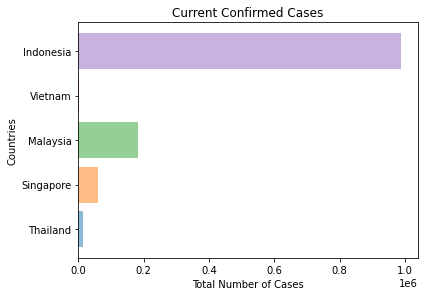

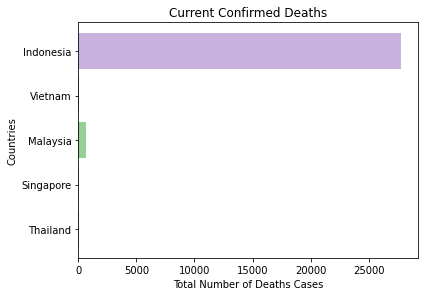

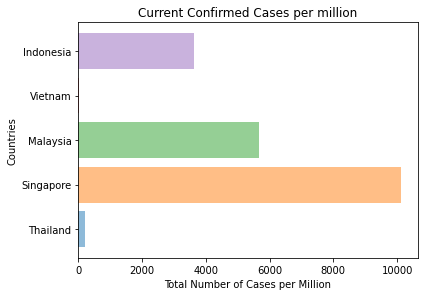

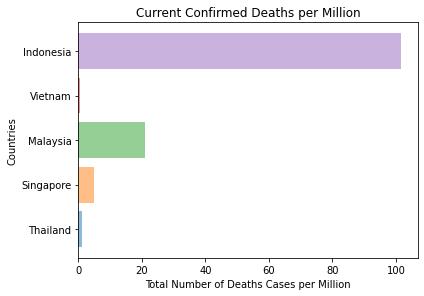

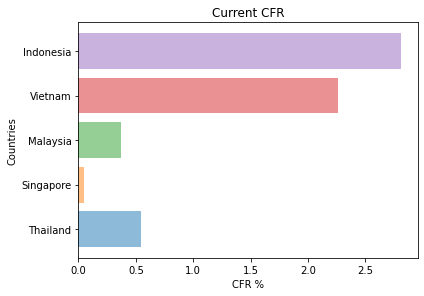

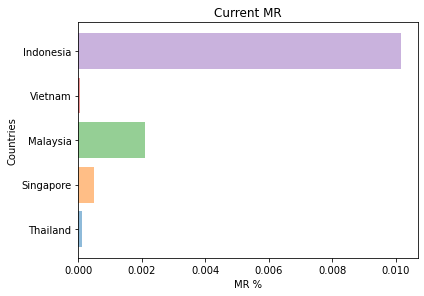

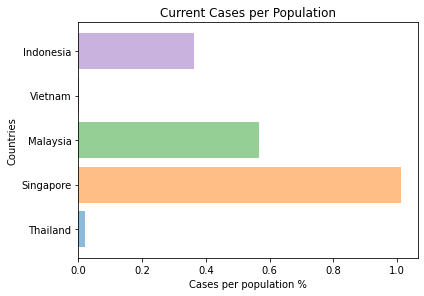

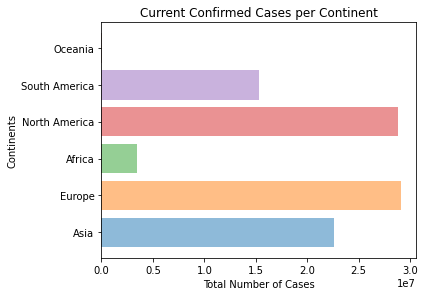

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,CFR,MR,cases_per_population
0,SGP,Asia,Singapore,2021-01-24,59308.0,48.0,29.0,0.0,10137.525,8.205,4.957,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.15,5850343.0,7915.731,42.4,12.922,7.049,85535.383,NaN,92.243,10.99,NaN,2.4,83.62,0.932,0.000489,0.000005,0.010138


In [23]:
#List of ASEAN countries used for this research
ASEAN = ['Thailand', 'Singapore', 'Malaysia', 'Vietnam', 'Indonesia']

#List of all continents
continents = current_COVID_df.continent.unique().tolist()[:-1]

bar_chart_compare_countries(ASEAN,1)
bar_chart_compare_countries(ASEAN,2)
bar_chart_compare_countries(ASEAN,3)
bar_chart_compare_countries(ASEAN,4)
bar_chart_compare_countries(ASEAN,5)
bar_chart_compare_countries(ASEAN,6)
bar_chart_compare_countries(ASEAN,7)

bar_chart_compare_cases_continents(continents)

get_current_cases_country("Singapore")

In [24]:
#Gets top 10 most affected countries

#Gets top 10 countries with most deaths

#Gets top 10 most affected countries/million

#Gets top 10 countries with most deaths/million


# **Data Visualisation - Indonesia vs Other Countries**

In [25]:
#Time Series cumulative data visualisation
#dv = data visualisation
#parameter name meaning name of country or continent
#parameter level: 1 - country 
#                 2 - continent
def dv_cases_deaths(name, level):
  if name:
    if level == 1:
      ts_columns = ['total_cases', 'total_deaths']

      timeseries_df = get_timeseries_per_country(name)

      new_cases_num_df = timeseries_df[ts_columns]
      new_cases_num_df.plot()

      #plt.plot(timeseries_df.total_cases, color='blue')
      #plt.plot(timeseries_df.total_deaths, color='orange')
      plt.xlabel('Date')
      plt.ylabel('Population')
      plt.title('Cumulative Confirmed Cases and Deaths in {}'.format(name))
      plt.show()
    elif level == 2:
      ts_columns = ['continent_total_cases', 'continent_total_deaths']

      timeseries_df = get_timeseries_per_continent(name)

      new_cases_num_df = timeseries_df[ts_columns]
      new_cases_num_df.plot()

      #plt.plot(timeseries_df.total_cases, color='blue')
      #plt.plot(timeseries_df.total_deaths, color='orange')
      plt.xlabel('Date')
      plt.ylabel('Population')
      plt.title('Cumulative Confirmed Cases and Deaths in {}'.format(name))
      plt.show()
    else:
      print("Level is not specified. Do you want to visualise a country or a continent?")
  else:
    print("Name is not specified. Please specify the name of a country/continent")

#Time Series cumulative data visualisation
#dv = data visualisation
#parameter name meaning name of country or continent
#parameter level: 1 - country 
#                 2 - continent
def dv_cases_deaths_per_million(name, level):
  if name:
    if level == 1:
      ts_columns = ['total_cases_per_million', 'total_deaths_per_million']

      timeseries_df = get_timeseries_per_country(name)

      new_cases_num_df = timeseries_df[ts_columns]
      new_cases_num_df.plot()

      #plt.plot(timeseries_df.total_cases, color='blue')
      #plt.plot(timeseries_df.total_deaths, color='orange')
      plt.xlabel('Date')
      plt.ylabel('Population')
      plt.title('Cumulative Confirmed Cases and Deaths in {}'.format(name))
      plt.show()
    elif level == 2:
      ts_columns = ['continent_total_cases', 'continent_total_deaths']

      timeseries_df = get_timeseries_per_continent(name)

      new_cases_num_df = timeseries_df[ts_columns]
      new_cases_num_df.plot()

      #plt.plot(timeseries_df.total_cases, color='blue')
      #plt.plot(timeseries_df.total_deaths, color='orange')
      plt.xlabel('Date')
      plt.ylabel('Population')
      plt.title('Cumulative Confirmed Cases and Deaths in {}'.format(name))
      plt.show()
    else:
      print("Level is not specified. Do you want to visualise a country or a continent?")
  else:
    print("Name is not specified. Please specify the name of a country/continent")

In [26]:
#Time Series cumulative data visualisation as a percentage to the country's population - Indonesia vs other ASEAN countries
#parameter 'countries' needs a list
#parameter 'status' needs either: 'cases'
#                                 'deaths'
def dv_compare_timeseries_between_countries(countries, status):
  if len(countries)>0:
    if status == "cases":
      ts_columns = ['total_cases']
      for country in countries:
        timeseries_df = get_timeseries_per_country(country)
        new_cases_num_df = timeseries_df[ts_columns]
        plt.plot(new_cases_num_df, label = country)

      plt.xlabel('Date')
      plt.ylabel('Population')
      plt.title('Cumulative Confirmed Cases in {}'.format(countries))
      plt.legend(loc="upper left")
      plt.show()
    elif status == "deaths":
      ts_columns = ['total_deaths']
      for country in countries:
        timeseries_df = get_timeseries_per_country(country)
        new_cases_num_df = timeseries_df[ts_columns]
        plt.plot(timeseries_df.total_deaths, label = country)

      plt.xlabel('Date')
      plt.ylabel('Population')
      plt.title('Cumulative Confirmed Deaths in {}'.format('countries'))
      plt.legend(loc="upper left")
      plt.show()
    else:
      print("Does not exist")
  else:
    print("Country is not inputted")
  

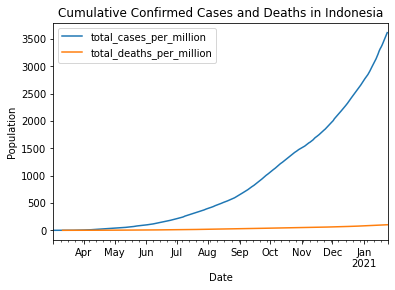

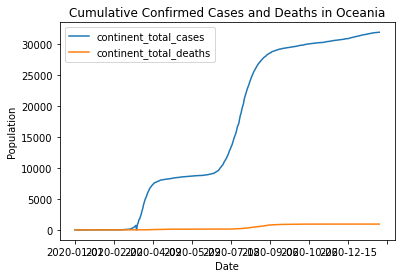

In [31]:
dv_cases_deaths_per_million("Indonesia", 1)
dv_cases_deaths_per_million("Oceania", 2)

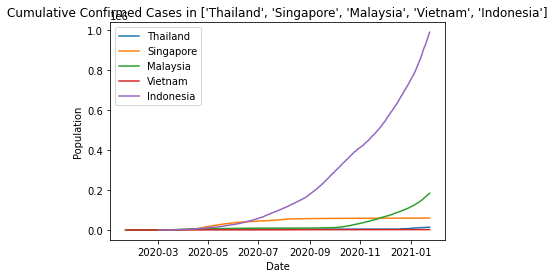

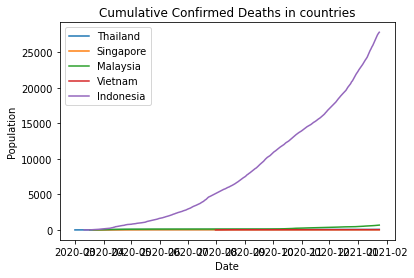

In [28]:
dv_compare_timeseries_between_countries(ASEAN, "cases")
dv_compare_timeseries_between_countries(ASEAN, "deaths")

In [29]:
#Find countries with similar GDP per Capita, HDI, and Population Density and Climate
#Similarity should be around +- 10% of the chosen country's data
#index - 1: GDP per Capita
#        2: HDI
#        3: Population Density
#        4: 
#Then returns an array of the countries that are most similar to the inputted country

def get_similar_countries(country, index):
  #Calls the function get_current_cases_country to get the most current data
  #of the country inputted in the parameter
  country_df = get_current_cases_country(country)

  #Gets the country's population density
  country_pd = country_df.population_density.astype(float).iloc[0]
  #Gets the country's GDP per capita
  country_GDP = country_df.gdp_per_capita.astype(float).iloc[0]
  #Gets the country's HDI
  country_HDI = country_df.human_development_index.astype(float).iloc[0]
  #print("{}'s HDI: {}".format(country, country_HDI))

  #Upper and lower limits to find similar data. 1.1 used so that it will get
  #countries with 5% more of the country's data and 0.9 is used so that it will
  #get countries with 5% less of the country's data
  upper = 1.05
  lower = 0.95

  index_factor = [1,2,3]

  similar_countries_df = current_COVID_df

  if any(i in index for i in index_factor):
    for i in index:
      if i == 1:
        lower_limit_GDP = country_GDP * lower
        upper_limit_GDP = country_GDP * upper
        similar_countries_df = similar_countries_df.loc[(similar_countries_df.gdp_per_capita >= lower_limit_GDP) & (similar_countries_df.gdp_per_capita <= upper_limit_GDP)]

        #subtract the other countries' GDP to the inputted country's GDP - new column named 'delta_GDP'
        #similar_countries_df['delta_GDP'] = similar_countries_df.gdp_per_capita - country_GDP
      if i == 2:
        lower_limit_PD = country_pd * lower
        upper_limit_PD = country_pd * upper
        similar_countries_df = similar_countries_df.loc[(similar_countries_df.population_density >= lower_limit_PD) & (similar_countries_df.population_density <= upper_limit_PD)]

        #similar_countries_df['delta_PD'] = similar_countries_df.population_density - country_PD
      if i == 3:
        lower_limit_HDI = country_HDI * lower
        upper_limit_HDI = country_HDI * upper
        similar_countries_df = similar_countries_df.loc[(similar_countries_df.human_development_index >= lower_limit_HDI) & (similar_countries_df.human_development_index <= upper_limit_HDI)]

        #similar_countries_df['delta_HDI'] = similar_countries_df.human_development_index - country_HDI
  else:
    print("No such index")
    similar_countries_df = similar_countries_df.iloc[0:0]

  similar_countries_df = similar_countries_df.reset_index(drop=True)
  similar_countries_df = similar_countries_df.set_index('date')

  return similar_countries_df.location.tolist()

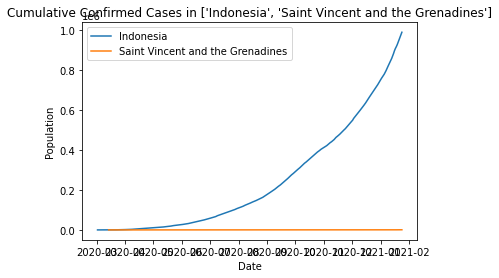

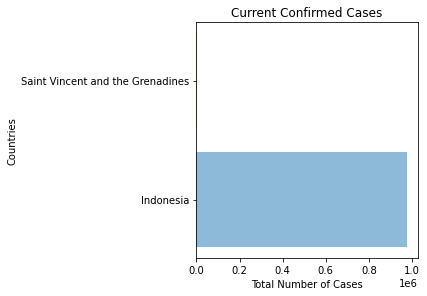

In [28]:
indices = [1,3]
countries = get_similar_countries("Indonesia", indices)
dv_compare_timeseries_between_countries(countries, "cases")
bar_chart_compare_cases_countries(countries, 1)

# **Linear Regression, Correlation and Confidence Test**

In [28]:
#lr_df meaning linear regression dataframe
linear_regression_df = COVID_current_merge.copy()


In [ ]:
correlation_df = COVID_current_merge.copy()

#**Stocks Data Pre-Processing**

In [29]:
import yfinance as yf
import pandas as pd


**Pre-Processing the list of companies from IDX**

In [30]:
#Gets company list listed in IDX from IDX's (Indonesia Stock Exchange) website
#file_path = 'https://idx.co.id/media/8127/09_listed-companies-by-entry-point-2020-en.pdf'

#Converts and downloads the content from PDF to CSV so it can be uploaded to github
#and use pd.read_csv instead of calling tabula
#tabula.convert_into(file_path, 'company_list.csv',stream=True, pages='all')

In [31]:
#Reads in the CSV file from github
file_path = 'https://raw.githubusercontent.com/filbertmiko/Analysis-of-COVID-19-and-its-Impact-on-IHSG-and-Rupiah/main/company_list.csv'

#Convert it into a pandas dataframe
company_list = pd.read_csv(file_path)

In [32]:
#Pre-process dataframe
#Detele any NaNs
idx_company_list = company_list.dropna()

#Filter out unwanted records
idx_companies = idx_company_list[idx_company_list.No != "No"]

#Convert column's data type
convert_dict = {'Kode': str, 
                'Nama Perusahaan': str
               } 
  
idx_companies = idx_companies.astype(convert_dict) 

idx_companies = idx_companies.reset_index()

#Drop unwanted columns
idx_companies = idx_companies.drop(['index','No','Entry Point', 'Sektor', 'Subsektor'], axis=1)


#Rename columns
idx_companies = idx_companies.rename(columns={"Kode": "Symbol", "Nama Perusahaan": "Name"}, errors="raise")

In [33]:
#Add IDX's extension for yfinance
#Example -> BBCA becomes BBCA.JK

JKSE_symbol = ".JK"
idx_companies['Symbol'] = idx_companies['Symbol'].astype(str) + JKSE_symbol

In [34]:
#Get information for the inputted Symbol and
#Turns the returned values (dict) to dataframe

#Use a for loop to loop through the company list dataframe and then for each
#iteration, call the function, and combine the returned df to the bigger df
def turn_info_into_df(ticker):
  #Get information for the inputted Symbol and
  symbol = yf.Ticker(ticker)

  keys = [*symbol.info.keys()]
  values = [*symbol.info.values()]

  items = [keys, values]
  df = pd.DataFrame(items)
  new_header = df.iloc[0] #grab the first row for the header
  df = df[1:] #take the data less the header row
  df.columns = new_header #set the header row as the df header
  #df1 = df[['a', 'b']]
  df = df[['sector', 'city', 'longBusinessSummary', 'country', 'industry', 'previousClose']]
  
  return(df)

turn_info_into_df("BBCA.JK")

,sector,city,longBusinessSummary,country,industry,previousClose
1,Financial Services,Jakarta,PT Bank Central Asia Tbk provides banking prod...,Indonesia,Banks—Regional,35400


In [35]:
#Combine table from idx_companies to the stock's details taken from yfinance